In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# data_file = 'tick_drop1.csv'
data_cols = ['generation', 'season','firsty','middle','lasty']
infile = 'tick_drop1.csv'
data = pd.read_csv(infile, names = data_cols, index_col=None)
#  These are the data from tick drop recorded from a single strain of "Rhipicephalus (Boophilus) microplus"
#  Generational drop data is a bit spotty, but should be more than sufficient with 46 generations of drop.
#  Season is a variable from 1-4 representing Spring through Winter.
#  First is the days it took the ticks to complete their life history and begin to drop from the host.
#  Middle is the number of days it took for 50% of the total number of ticks that would eventually drop to drop from the host.
#  Last is the final day in which female ticks dropped from the host, completing the drop.
data

,generation,season,firsty,middle,lasty
0,1,3,22,24,30
1,2,1,21,24,30
2,3,2,21,25,35
3,4,3,21,25,35
4,5,4,20,24,32
5,6,1,20,24,34
6,8,3,19,23,33
7,9,4,21,25,33
8,10,1,21,23,35
9,11,1,19,23,31


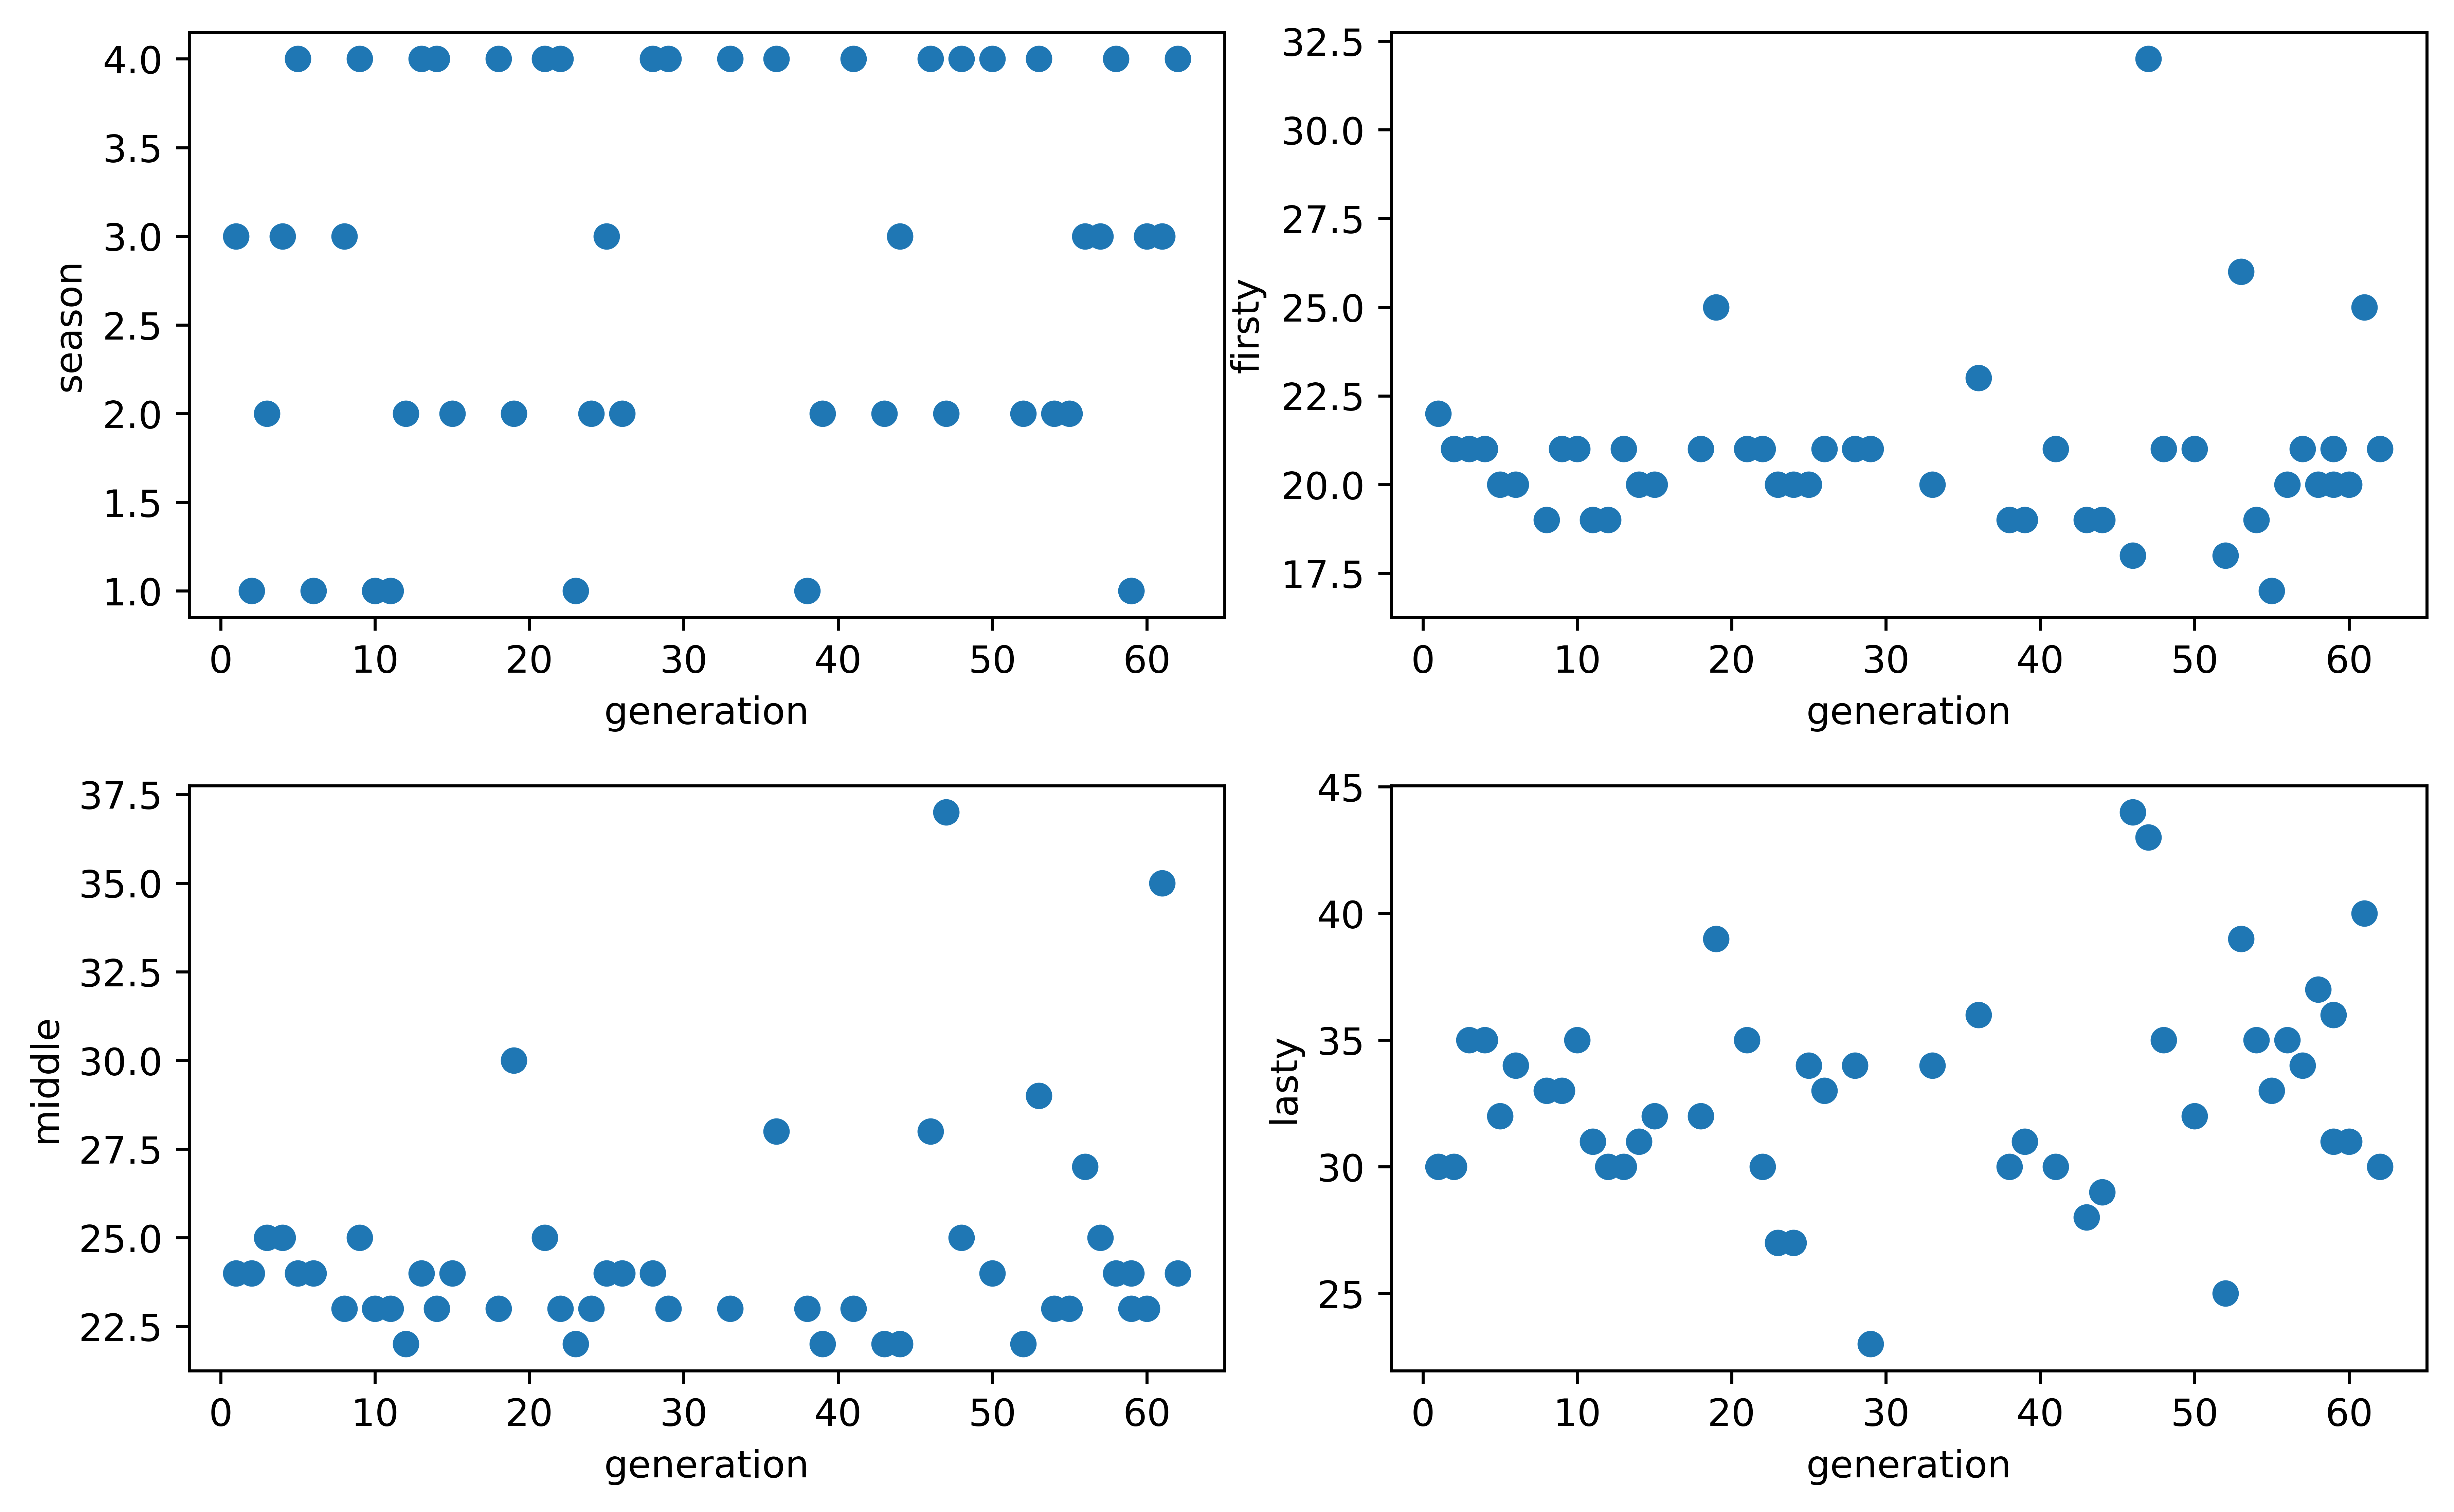

In [2]:
nrows, ncols = 3, 2
fig = plt.figure(figsize = (9,8), dpi = 800)
# My main concern is how variables are related to generation, but I dont know if there is anything else I might want to look at.
for i in range(1, 5):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.scatter(data.iloc[:,0], data.iloc[:,i])
    ax.set_xlabel(data.columns[0])
    ax.set_ylabel(data.columns[i])

plt.tight_layout()
plt.show()

C:\Users\Brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

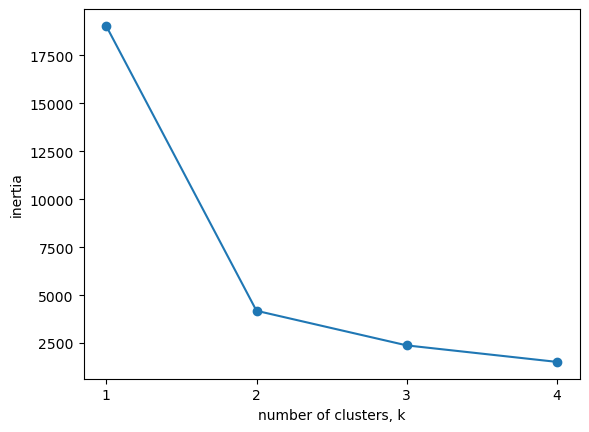

In [3]:
# These charts aren't promising, so I'm going to run KMeans to see if there's anything suggestive that I'm not visually seeing.
from sklearn.cluster import KMeans

inertias = []
ks = range(1, 5)

for k in ks:
# Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k, n_init='auto')
    
# Fit model to samples
    model.fit(data.iloc[:,0:4])
    
# Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [4]:
model = KMeans(n_clusters = 3, n_init='auto')

# Fit model to points.
model.fit(data.iloc[:,0:4])

# get the centroids.
centroids = model.cluster_centers_

# check the dimensions of the centroids.
print(centroids.shape)

(3, 4)


C:\Users\Brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


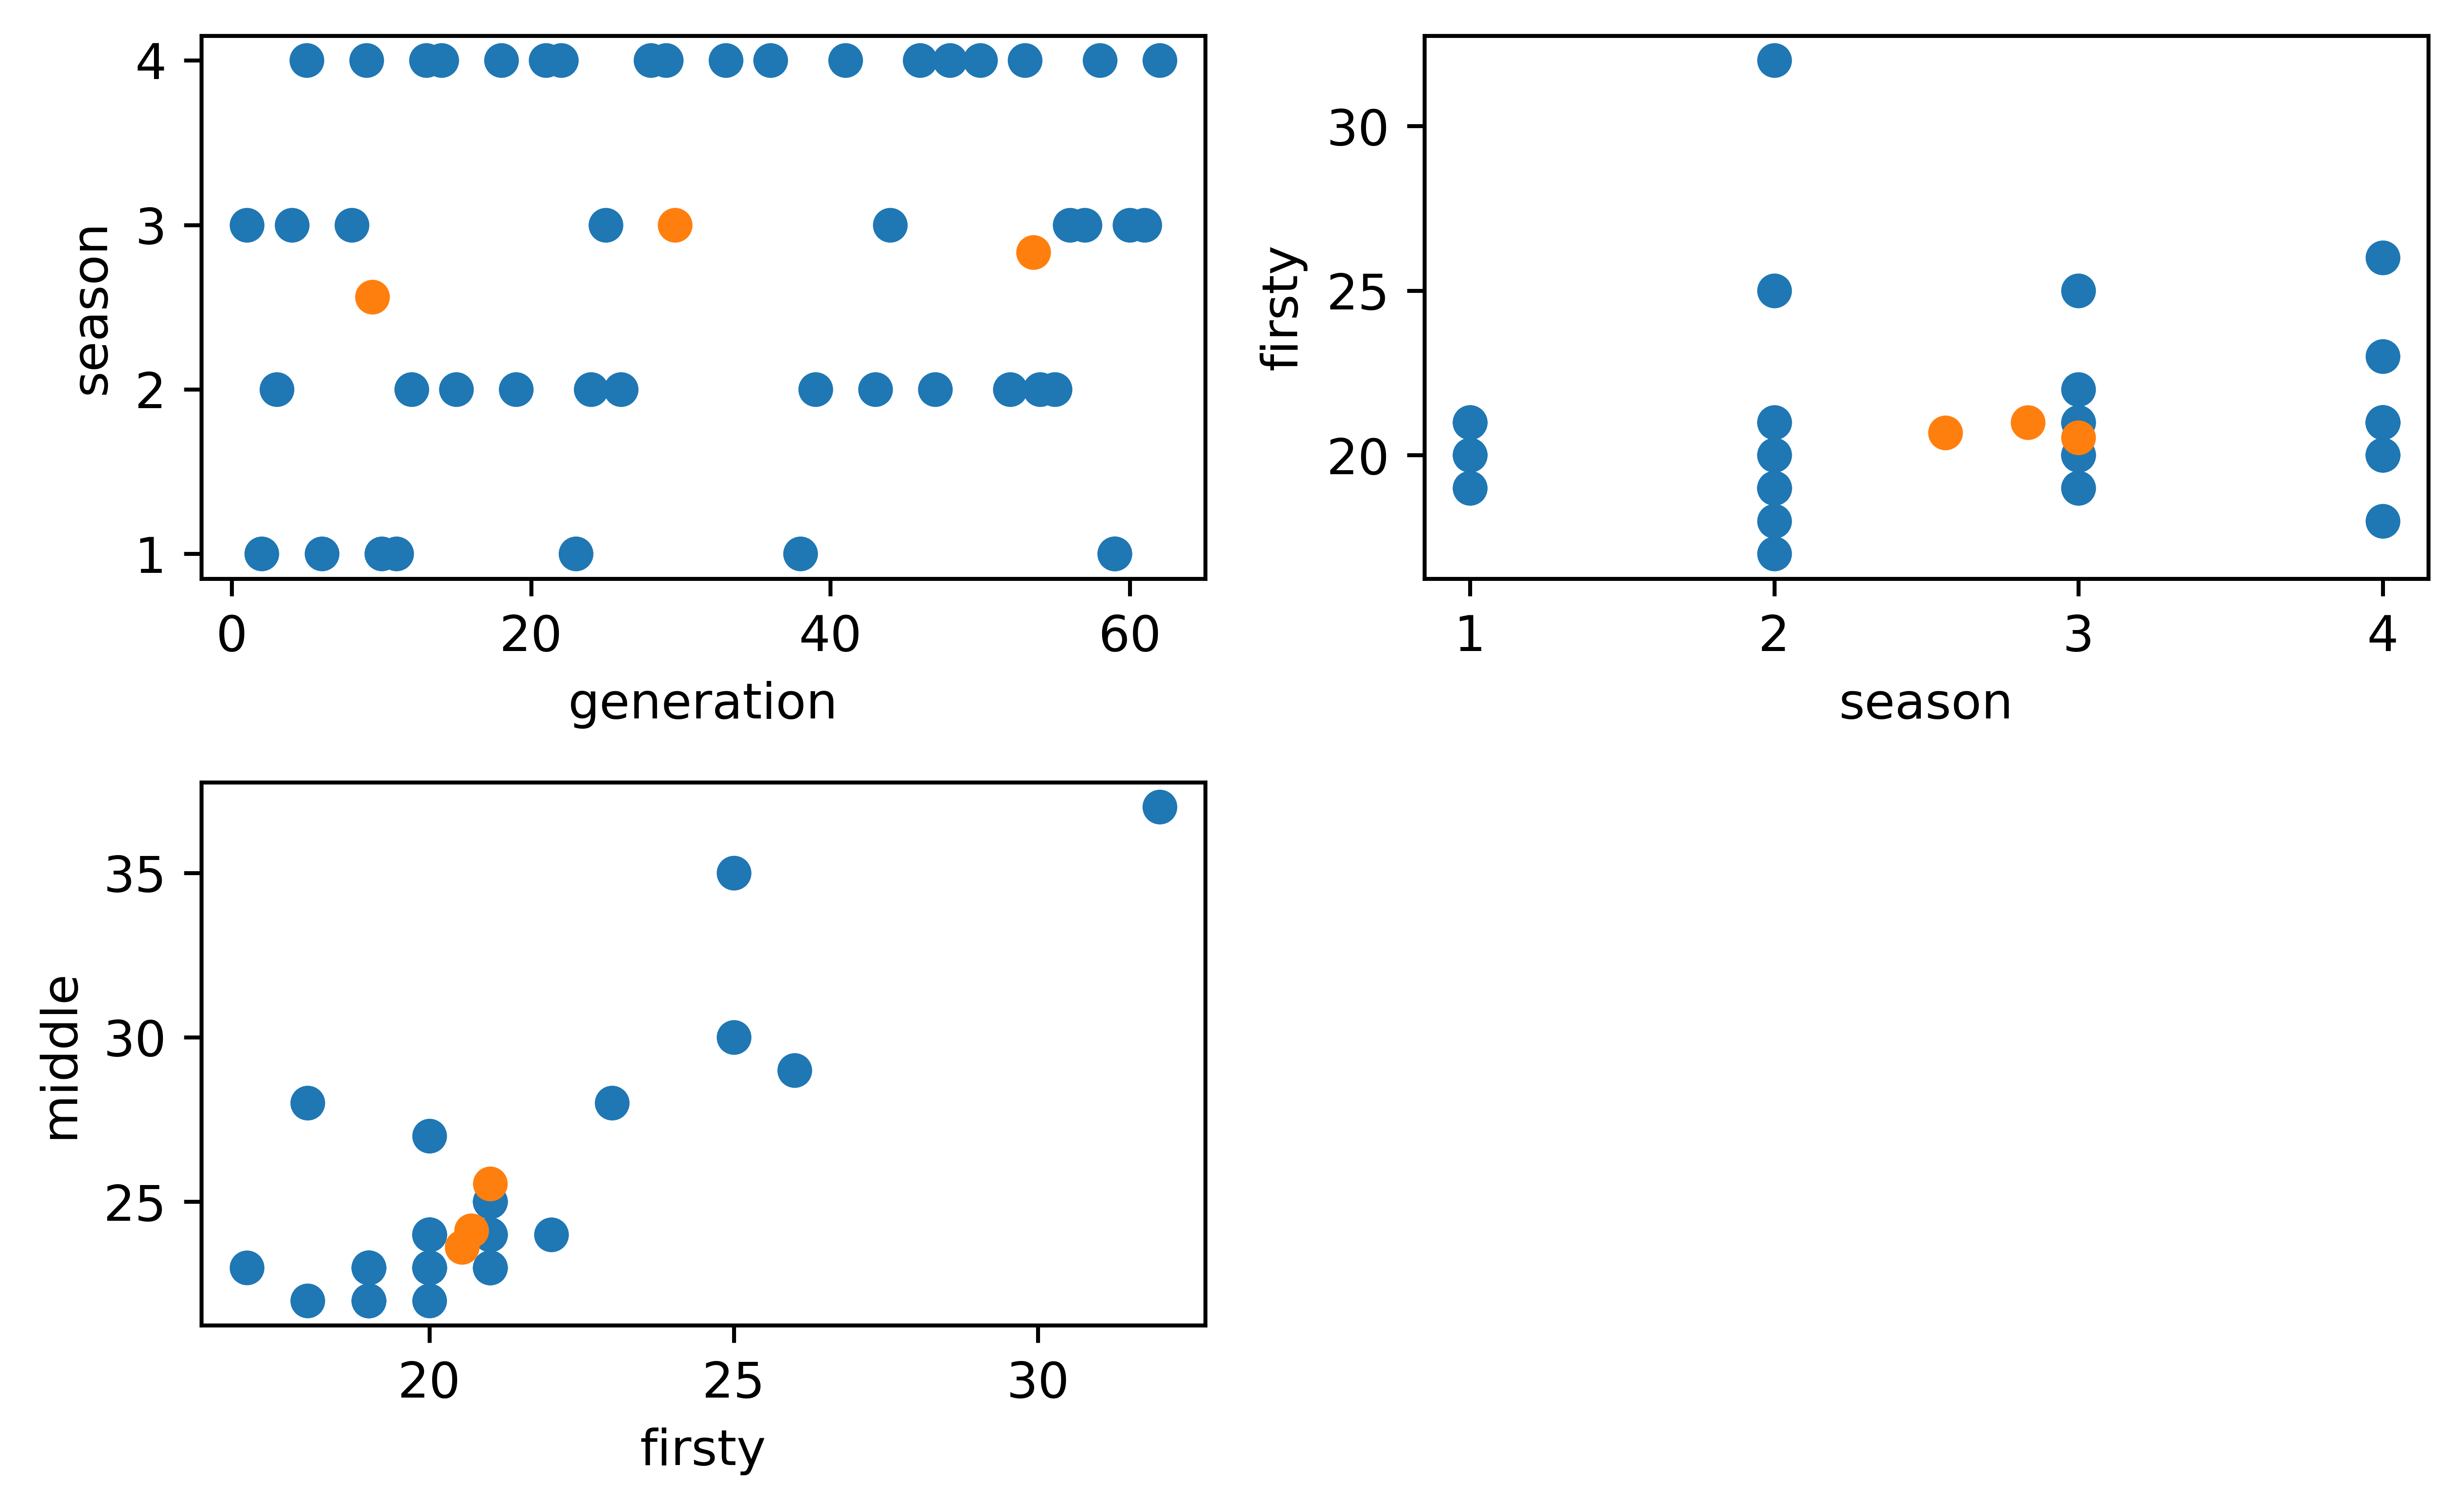

In [5]:
nrows, ncols = 3, 2
fig = plt.figure(figsize = (7,6), dpi = 800)

for i in range(1, 4):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.scatter(data.iloc[:,i-1], data.iloc[:,i])
    ax.scatter(centroids[:,i-1], centroids[:,i])
    ax.set_xlabel(data.columns[i-1])
    ax.set_ylabel(data.columns[i])

plt.tight_layout()
plt.show()

In [6]:
labels = model.fit_predict(data)

# Create a DataFrame with labels and season as columns: df
df = pd.DataFrame({'labels': labels, 'season': data.season})

# Create a cross-tabulation of the tick drop table and the model prediction
ct = pd.crosstab(df['labels'], df['season'])
print(ct)

season  1  2  3  4
labels            
0       4  3  3  5
1       2  5  5  6
2       2  4  1  7


C:\Users\Brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
# again with first

df2 = pd.DataFrame({'labels': labels, 'firsty': data.firsty})
ct = pd.crosstab(df2['labels'], df2['firsty'])
print(ct)

firsty  17  18  19  20  21  22  23  25  26  32
labels                                        
0        0   0   3   4   7   1   0   0   0   0
1        1   2   3   4   5   0   0   1   1   1
2        0   0   2   4   6   0   1   1   0   0


In [8]:
# Again with middle
df3 = pd.DataFrame({'labels': labels, 'middle': data.middle})
ct = pd.crosstab(df3['labels'], df3['middle'])
print(ct)

middle  22  23  24  25  27  28  29  30  35  37
labels                                        
0        1   5   6   3   0   0   0   0   0   0
1        3   4   4   2   1   1   1   0   1   1
2        2   6   3   1   0   1   0   1   0   0


In [9]:
# Lastly with last
df4 = pd.DataFrame({'labels': labels, 'lasty': data.lasty})
ct = pd.crosstab(df4['labels'], df4['lasty'])
print(ct)

lasty   23  25  27  28  29  30  31  32  33  34  35  36  37  39  40  43  44
labels                                                                    
0        0   0   0   0   0   4   2   3   2   1   3   0   0   0   0   0   0
1        0   1   0   1   1   1   2   1   1   1   3   1   1   1   1   1   1
2        1   0   2   0   0   3   1   0   1   3   1   1   0   1   0   0   0


In [11]:
df

,labels,season
0,0,3
1,0,1
2,0,2
3,0,3
4,0,4
5,0,1
6,0,3
7,0,4
8,0,1
9,0,1
